# MTH5001 Introduction to Computer Programming - Lab 2
Dr Lucas Lacasa and Prof. Thomas Prellberg

## Exercises on number manipulation

Don't forget to import modules when needed. It's best to use `numpy` instead of `math`. Nearly everything in `math` is also in `numpy`, but `numpy` is more versatile. For example, `math.exp()` does not allow complex numbers, but `numpy.exp()` does.

In [1]:
import numpy as np

### Exercise 1: Compute $\exp(i\pi)$.

In [2]:
np.exp(1j*np.pi)

(-1+1.2246467991473532e-16j)

### Computing numerical Approximations to Numbers and Functions

In what follows we will use Python to numerically compute approximations given by finite truncations of infinite series or product expansions, or infinite continued fractions. As an example, I will numerically evaluate the [Taylor Series](http://en.wikipedia.org/wiki/Taylor_series) of $1/(1-x)$, which is given by the geometric series
$$1/(1-x)=\sum_{k=0}^\infty x^k=1+x+x^2+x^3+\ldots\;.$$
This series converges for $|x|<1$.

To compute the Taylor polynomials of degree $5$ and $6$, we need to evaluate $1+x+x^2+x^3+x^4+x^5$ and $1+x+x^2+x^3+x^4+x^5+x^6$ at $x=1/2$. This should be a good approximation to $1/(1-1/2)=2$, which we can compare the result to.

In [3]:
print(1+1/2+(1/2)**2+(1/2)**3+(1/2)**4+(1/2)**5)
print(1+1/2+(1/2)**2+(1/2)**3+(1/2)**4+(1/2)**5+(1/2)**6)
print(2)

1.96875
1.984375
2


Using our knowledge of graphical plotting routines from the last exercise sheet, we can also visualise that Taylor polynomials of larger order give better approximations, as long as $|x|<1$.

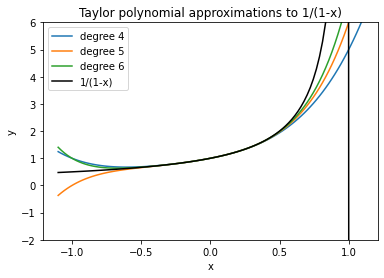

In [4]:
import matplotlib.pyplot as plt
x = np.linspace(-1.1, 1.1, 100)

plt.plot(x,1+x+x**2+x**3+x**4,label='degree 4')
plt.plot(x,1+x+x**2+x**3+x**4+x**5,label='degree 5')
plt.plot(x,1+x+x**2+x**3+x**4+x**5+x**6,label='degree 6')

plt.plot(x,1/(1-x),color='black',label='1/(1-x)')

plt.ylim([-2,6]); plt.xlabel('x'); plt.ylabel('y')
plt.title('Taylor polynomial approximations to 1/(1-x)')
plt.legend(); plt.show()

### Exercise 2: Compute a Taylor Series

The Taylor Series of $\exp x$ is given by 
$$\exp x=\sum_{k=0}^\infty\frac{x^k}{k!}\;.$$
Compute the Taylor polynomials of degree $5$, $6$, and $7$ evaluated at $x=1.5$, and compare the result with $\exp(1.5)$.

Remember that you can use print() to print several results within the same code box.

In [5]:
import math; import numpy as np; fact = math.factorial

def taylor(x, degree):
    return [x**k/fact(k) for k in range(0,degree+1)]
a=1.5
for i in range(5,8):
    print(f"approximation at degree {i}: {sum(taylor(a, i))} \n")

print(f"most precises value of exp({a})",np.exp(a))

approximation at degree 5: 4.46171875 

approximation at degree 6: 4.4775390625 

approximation at degree 7: 4.480929129464286 

most precises value of exp(1.5) 4.4816890703380645


For small values of $k$, you can compute $k!$ in your head and enter the result directly into Python. However, Python also provides `math.factorial()` to do it for you (this function is not included in `numpy`). If you need to use `math.factorial()` several times in a formula, the expression becomes quite complicated. So it is helpful to assign `fac=math.factorial`. Do this, and compute $10!$ and $20!$ using `fac(10)` and `fac(20)`.

In [6]:
import math; fac=math.factorial; print(fac(10)); print(fac(20))

3628800
2432902008176640000


In [7]:
from math import factorial as fac; print(fac(10)); print(fac(20))
# not recommended due to confusion with other libraries e.g. numpy

3628800
2432902008176640000


Using the factorial function, compute the Taylor polynomials of degree $8$, $9$, and $10$ evaluated at $x=1.5$, $x=2.5$, and $x=1+i$ and compare with the result from the infinite sum. To save you typing, and to make the code more readable, you should assign the value of $x$ using an assignment like `x=1.5`. Remember that you can use `print()` to print several results within the same code box.

In [8]:
import math; import numpy as np; fact = math.factorial

def taylor(x, degree):
    return [x**k/fact(k) for k in range(0,degree+1)]

def t_approx(a, degree_range_start, degree_range_end):
    for i in range(degree_range_start, degree_range_end +1):
        print(f"approximation at degree {i}: {sum(taylor(a, i))} \n")
    print(f"   most precise value of exp({a}): {np.exp(a)} \n")
    
t_approx(1.5, 8, 10); t_approx(2.5, 8, 10); t_approx(1+1j, 8, 10)

approximation at degree 8: 4.48156476702009 

approximation at degree 9: 4.481670706612723 

approximation at degree 10: 4.481686597551619 

   most precise value of exp(1.5): 4.4816890703380645 

approximation at degree 8: 12.168602837456596 

approximation at degree 9: 12.179115120485767 

approximation at degree 10: 12.18174319124306 

   most precise value of exp(2.5): 12.182493960703473 

approximation at degree 8: (1.4686507936507935+2.2873015873015876j) 

approximation at degree 9: (1.468694885361552+2.287345679012346j) 

approximation at degree 10: (1.468694885361552+2.2873544973544977j) 

   most precise value of exp((1+1j)): (1.4686939399158851+2.2873552871788423j) 



### Exercise 3: Compute the Riemann Zeta Function

The [Riemann zeta function](http://en.wikipedia.org/wiki/Riemann_zeta_function) is given by the infinite series
$$\zeta(s)=\sum_{n=1}^\infty\frac1{n^s}\;.$$
$\zeta(s)$ also can be expressed as an infinite product over all primes,
$$\zeta(s)=\prod_p\left(\frac1{1-p^{-s}}\right)\;,$$
where the product is over the primes $p=2,3,5,7,11,13,\ldots$.

Using these expressions, compute both the $6$th partial sum and the $6$th partial product for $s=2$ and $s=4$ (i.e. truncate the infinite sum or product after six terms) and compare to the exact values
$$\zeta(2)=\frac{\pi^2}6\;,\;\zeta(4)=\frac{\pi^4}{90}\;.$$

In [9]:
import numpy as np;

def zeta_sum(n,s):
    print(sum([1/n**s for n in range(1,n+1)]))

def zeta_prod(p,s):
    primes = [2,3,5,7,11,13]
    print(np.prod([1/(1-p**(-s)) for p in primes[0:p]]))

zeta_sum(6,2); zeta_prod(6,2); print(np.pi**2/6) 
zeta_sum(6,4); zeta_prod(6,4); print(np.pi**4/90) 

1.4913888888888889
1.6179176613136572
1.6449340668482264
1.0811235339506173
1.0822933039823095
1.082323233711138


While you may have developed some feeling for infinite series during your studies, infinite products will still feel quite daunting. So I suggest you plot partial products with $4$, $5$, and $6$ factors, and compare to the plot of the Riemann zeta function. This function can be imported from the module `scipy`. I suggest using the code

`import scipy.special
zeta=scipy.special.zeta`

For the plot, I suggest an $x$-range of $[1,5]$ and a $y$-range of $[1,5]$

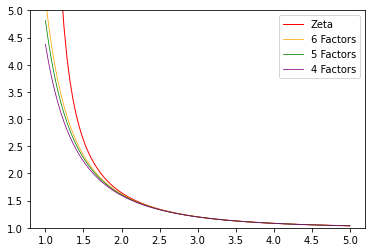

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

# function to generate individual zeta approximations
def zeta_value(p,s):
    primes = [2,3,5,7,11,13]
    return np.prod([1/(1-p**(-s)) for p in primes[0:p]])

# function to generate and store a list of zeta approximations,
# at a fixed value of p, while s varies within the the range of x
def zeta_p(p,x):
    arr = []
    for i in x:
        value = zeta_value(p,i)
        arr.append(value)
    return np.array(arr) # create an array with same dimensions as x

x = np.linspace(1,5,100)
zeta = scipy.special.zeta

plt.plot(x,zeta(x),label='Zeta',color='red', lw=1)
plt.plot(x,zeta_p(6,x),label='6 Factors',color='orange', lw=0.75)
plt.plot(x,zeta_p(5,x),label='5 Factors',color='green', lw=0.75)
plt.plot(x,zeta_p(4,x),label='4 Factors',color='purple', lw=0.75)

plt.ylim([1,5]);plt.legend();plt.show()

### Exercise 4: Continued Fraction

The golden ratio $\rho=\frac{1+\sqrt5}2$ is given by
$$\rho=1+\cfrac1{1+\cfrac1{1+\cfrac1{1+\cfrac1{1+\ldots}}}}\;.$$
To approximate $\rho$, compute the partial continued fraction
$$1+\cfrac1{1+\cfrac1{1+\cfrac1{1+\cfrac1{1+\cfrac11}}}}$$
and compare with the exact value.

In [11]:
import numpy as np
rho = (1+np.sqrt(5))/2

# convergents are constructed by fibonacci numbers
def fib(n):
    if n==1 or n==2:
        return 1
    else:
        x_1 = 1
        x_2 = 1
        for i in range(n-2):
            x_3 = x_1 + x_2
            x_1 = x_2
            x_2 = x_3
        return x_3

def convergent(n): # includes 0, n = number of fractions
    return fib(n+2)/fib(n+1)

a = int(input("calculate nth convergent, n=")) # in this case, 5
print(f"exactl value: {rho}")
print(f"approximation: {convergent(a)}")
print(f"difference: {abs(rho-convergent(a))}")

calculate nth convergent, n=5
exactl value: 1.618033988749895
approximation: 1.625
difference: 0.0069660112501050975


**Advanced:** Now extend this calculation to estimate
$$f(x)=x+\cfrac1{x+\cfrac1{x+\cfrac1{x+\cfrac1{x+\ldots}}}}\;.$$
Can you guess what the exact result is for $x=2$ and $x=4$?

In [13]:
import numpy as np
# calculate approximations to infinite continuted fractions
# of the form [x:x,x,x...]

# fib_ext(2,n) = 1,2,5,12,29,
# fib_ext(4,n) = 1,4,17,72,305
def fib_ext(x,n):
    if n==1:
        return 1
    if n==2:
        return x
    else:
        x_1 = 1
        x_2 = x
        for i in range(n-2):
            x_3 = x_1 + x*x_2
            x_1 = x_2
            x_2 = x_3
        return x_3

def converg(): # includes 0, n = number of fractions
    x = int(input("x="))
    n = int(input("n="))
    return fib_ext(x,n+2)/fib_ext(x,n+1)

converg()
# when x=4, 1000th convergent is 4.23606797749979
# when x=2, 1000th convergent is 2.414213562373095

x=2
n=4


2.413793103448276

## Exercises related to week 2 (sequences)

### Exercise 1: Some simple finite sums over the integers

In line with the content of the last lecture, we will first construct some simple sequences with the aim of summing these and using this to discover some nice numerical patterns.

As an example of what I have in mind, lets construct sequences of the first $n$ odd numbers for various values of $n$. The easiest way is to simply use the range object to create a list with entries starting at $1$ and increasing by $2$ and ending when the entries get larger than $2n-1$.


In [ ]:
n=15
list1=list(range(1,2*n,2))
print(list1)
print(len(list1))

An alternative is to use list comprehension, which easily generalises to other cases where we have an explicit formula for computing the $k$-th list entry. In this case, using the formula $f(k)=2k+1$ generates the odd numbers $1,3,5,\ldots$  for $k=0,1,2,\ldots$.

In [ ]:
n=15
print([2*k+1 for k in range(n)])

Now we can add the first $n$ numbers and see if we can find a pattern.

In [ ]:
print(sum([2*k+1 for k in range(1)]))
print(sum([2*k+1 for k in range(2)]))
print(sum([2*k+1 for k in range(3)]))
print(sum([2*k+1 for k in range(4)]))

This works, but is really cumbersome. How about treating `sum([2*k+1 for k in range(n)])` as a formula for generating another list? **Please make sure you study the next line thoroughly until you really understand what is going on here.** For example, notice that each element of the resulting list is the sum of another list.

In [ ]:
print([sum([2*k+1 for k in range(n)]) for n in range(20)])

Do you recognise a pattern? The numbers in this list are all squares, so we should compare this with a list of the first 20 squares to confirm that we have a match.

In [ ]:
print([n**2 for n in range(20)])

#### Exercise 1.a: Generate a list of the first $n$ numbers of the form $3k(k+1)+1$ for $n=15$ and $n=20$.


In [14]:
print([3*k*(k+1)+1 for k in range(15+1)])
print([3*k*(k+1)+1 for k in range(20+1)])

[1, 7, 19, 37, 61, 91, 127, 169, 217, 271, 331, 397, 469, 547, 631, 721]
[1, 7, 19, 37, 61, 91, 127, 169, 217, 271, 331, 397, 469, 547, 631, 721, 817, 919, 1027, 1141, 1261]


#### Exercise 1.b: Generate a list that contains the sum of the above lists of length $n$ with $n$ ranging from $0$ to $19$.

(You will need to have understood the example given above to be able to do this.)

In [15]:
sum_list = []
for i in range(0,19+1):
    sum_list.append(sum([3*k*(k+1)+1 for k in range(i+1)]))
print(sum_list)

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 8000]


#### Exercise 1.c: Guess an explicit formula and use this to generate this list directly.

In [16]:
sum_list = []
for i in range(0,19+1):
    sum_list.append(sum([3*k*(k+1)+1 for k in range(i+1)]))
print(sum_list)

print(sum([3*k*(k+1)+1 for k in range(15+1)]))
print(sum_list[15]) # these values are equal for n=15, as expected

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 8000]
4096
4096
